<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Part 1

Choose one data set from the machine learning repositories, perform data visualization, and indicate which algorithm will work best for this data set.

### Data visualization with dataset: Bank_Notes

Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Load data and inspect the first rows

In [2]:
df = pd.read_csv ('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Show summary statistics

In [3]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Data visualization

Visual inspection to see which cluster would fit the data better

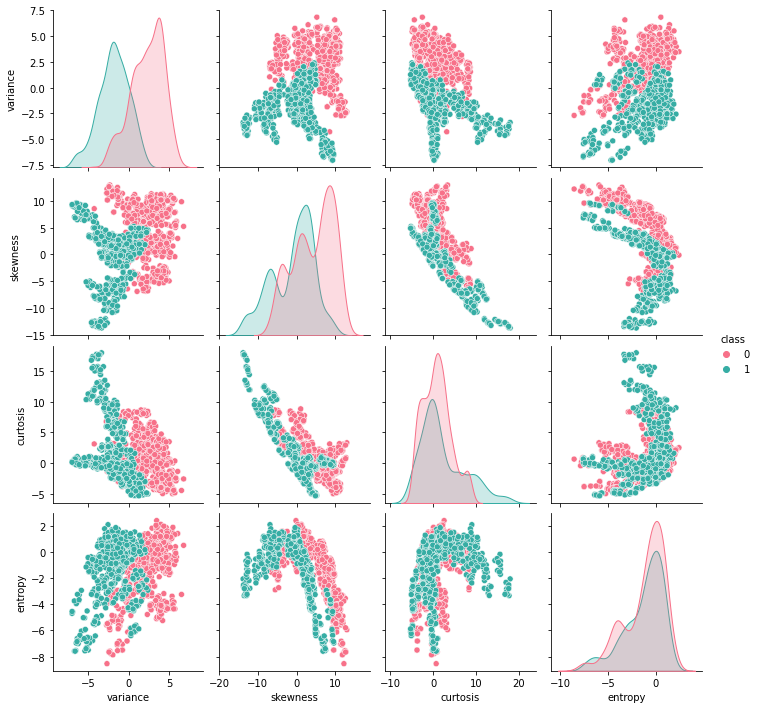

In [4]:
#Plot both scatter Plots and histohram with "pairplot"
sns.pairplot(df, hue="class", palette="husl")

### Clustering Algorithms

#### K-means

In [7]:
from sklearn.cluster import KMeans

# Instantiate object
nClusters = 4  #we have to arbitrarily select the number of desired clusters.
km = KMeans(n_clusters = nClusters)
km.fit_predict

# Create centers
y_predict = km.fit_predict(df[['variance', 'skewness']])
df['cluster'] = y_predict

# Instantiate the three clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Text(0.5, 1.0, 'K-Means of BankNote Authentication')

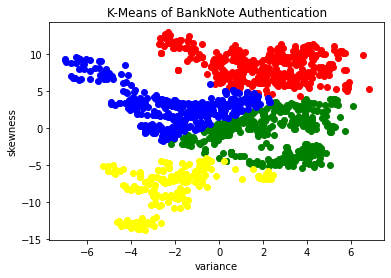

In [9]:
# Plot clusters in scatterplot
plt.scatter(df1.variance, df1['skewness'], color = 'green') 
plt.scatter(df2.variance, df2['skewness'], color = 'red')
plt.scatter(df3.variance, df3['skewness'], color = 'blue') 
plt.scatter(df4.variance, df4['skewness'], color = 'yellow')

#Labeling scatter plot
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('K-Means of BankNote Authentication')

#### DBSCAN

    1. It requires minimum domain knowledge.

    2. It can discover clusters of arbitrary shape.

    3. Efficient for large database, i.e. sample size more than few thousands.

<Figure size 432x288 with 0 Axes>

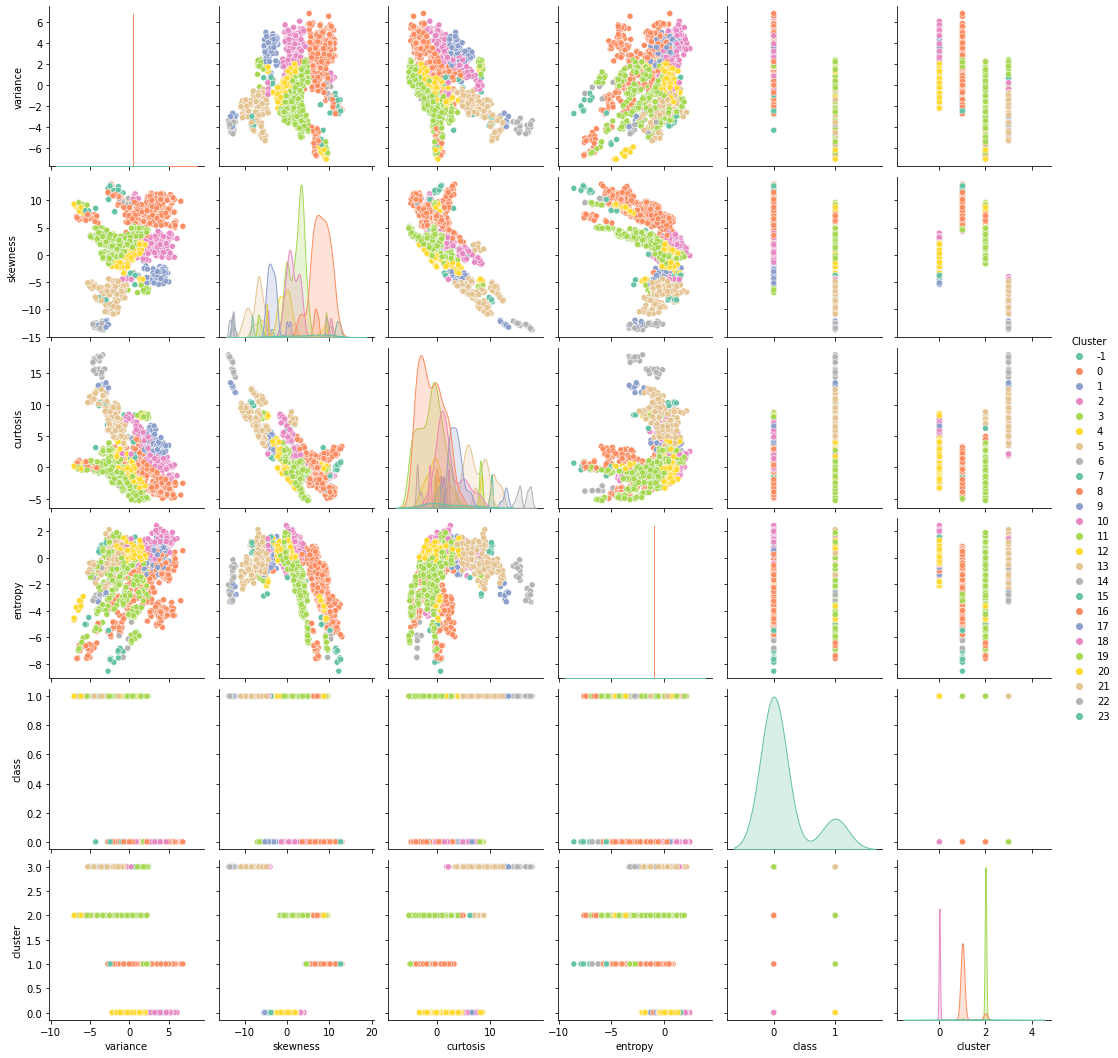

In [26]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering; choose the parameters eps and MinPts
epsA = 1.45
MinPts = 4
db = DBSCAN(eps =epsA, min_samples = MinPts, metric = 'euclidean')
model = db.fit(df)

# Extract cluster labels
label = model.labels_
NClusters = len(set(labels))

# Create a column of the cluster labels in the DataFrame
df["Cluster"] = labels

# Scatter Plots with "Cluster" as hue
plt.figure(1)
fa = sns.pairplot(data=df, hue="Cluster", palette="Set2")
#fa.set(xlim=(0, 500), ylim=(0,5000))
plt.show()



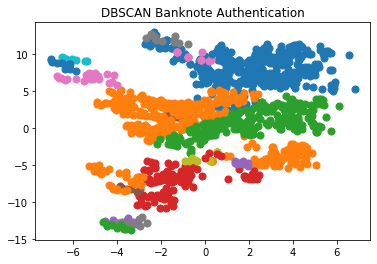

In [24]:
#DBSCAN calculations
data = df.values

dbs = DBSCAN(eps =1.45, min_samples = 4, metric = 'euclidean')
model = dbs.fit(data)
label = model.labels_
clusters = np.zeros_like(label, dtype=bool)
clusters[dbs.core_sample_indices_]=True
nclusters = len(set(label)) - (1 if -1 in label else 0)
ymeans = dbs.fit_predict(data)

#For loop to plot scatterplot depending on number of clusters
for i in range(nclusters):
    plt.scatter(data[ymeans == i, 0], data[ymeans == i, 1], s = 50)

#Labeling scatter plot  
plt.title("DBSCAN Banknote Authentication")
plt.show()